In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
import os
import random

folder_path = '/Users/mouam/OneDrive/Bureau/data'
filenames = os.listdir(folder_path)
random.shuffle(filenames) # shuffle the files

In [52]:
# put in image list the shuffled card 
image_list = []
for filename in filenames:
    filepath = os.path.join(folder_path, filename)
    image = cv2.imread(filepath)
    image_list.append(image)

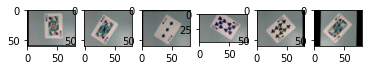

In [53]:
fig, ax = plt.subplots(1, 6) # Display 3 images
for i in range(6):
    ax[i].imshow(image_list[i])   
plt.show()

## DATA PROCESSING

In [5]:
# Get labels
def getlabel(name):
    if name == 'Ace':
        im_label = '1'
    elif name == '2':
        im_label = '2'
    elif name == '3':
        im_label = '3'
    elif name == '4':
        im_label = '4'
    elif name == '5':
        im_label = '5'
    elif name == '6':
        im_label = '6'
    elif name == '7':
        im_label = '7'
    elif name == '8':
        im_label = '8'
    elif name == '9':
        im_label = '9'
    elif name == '10':
        im_label = '10'
    elif name == 'Jack':
        im_label = '11'
    elif name == 'Queen':
        im_label = '12'
    elif name == 'King':
        im_label = '13'
    return im_label

In [6]:
label = []
for index, image in enumerate(image_list):
    # Get the filename for the current image using the index
    filename = filenames[index]
    name = filename.split("_")
    label.append(getlabel(name[0]))

In [10]:
image_data3 = []
for image in image_list:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    im_data = gray.flatten()
    
    if np.shape(im_data)[0] < 4800: 
        im_data = np.append(im_data, np.zeros(4800 - np.shape(im_data)[0]))
   
    #print(np.shape(im_data))    
    image_data3.append(im_data)

In [11]:
from sklearn.model_selection import train_test_split
    
X = image_data3
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise en forme des donnees
scaler = StandardScaler()

# Caclul moyenne et ecart-type
scaler.fit(X_train)

# Normalisation des donnees :
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [12]:
print("X_train :",np.shape(X_train))
print("X_train resized and normalized :",np.shape(X_scaled_train))

X_train : (8320, 4800)
X_train resized and normalized : (8320, 4800)


## KNN MODEL 

In [13]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 1, p = 1)
clf.fit(X_scaled_train, y_train)
y_pred = clf.predict(X_scaled_test)

print ("KNN Accuracy on testing set :", accuracy_score(y_test, y_pred))
print ("\nConfusion Matrix:")
print (metrics.confusion_matrix(y_test, y_pred))

KNN Accuracy on testing set : 0.38990384615384616

Confusion Matrix:
[[90  0  0  0  0 23 33  7  6  5  1  2  4]
 [ 0 46 17 21 25  4  1  1  2  5 11  9 23]
 [ 1  1 66 43 43  0  0  0  0  0  0  1  3]
 [ 2  7 34 66 30  0  0  0  0  1  0  1  4]
 [ 3  5 41 31 82  0  0  0  0  0  0  0  6]
 [13  0  0  0  0 89 30  8  5  2  0  0  2]
 [23  0  0  0  0 41 82 10  7  1  1  0  0]
 [10  0  0  0  0 23 23 59 32 13  4  0  1]
 [18  0  0  0  0  9 15 42 48 18  9  3  2]
 [ 5  0  0  0  1  6 20 24 25 55 22  9  5]
 [12  8  1  0  9  3  5  6 15 40 40 20  8]
 [13 10  3  2  3  1  1  8 14 24 24 52  1]
 [ 7 18 10 11  9  1  2  3  5  7  7 19 36]]


## RANDOM FOREST MODEL

In [14]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=1)
RF.fit(X_scaled_train, y_train)
y_pred = RF.predict(X_scaled_test)

print ("SVC Accuracy on testing set :", accuracy_score(y_test, y_pred))
print ("\nConfusion Matrix:")
print (metrics.confusion_matrix(y_test, y_pred))

SVC Accuracy on testing set : 0.5403846153846154

Confusion Matrix:
[[ 62   0   0   1   2  44  16  10  12  12   3   7   2]
 [  1 120   3   3   1   0   0   0   1   1   2   9  24]
 [  0   2  88  38  28   0   0   0   0   0   0   1   1]
 [  0   1  37  75  30   0   0   0   0   0   0   0   2]
 [  0   1  26  24 114   0   0   0   0   0   0   0   3]
 [  0   0   0   0   0 116   3  18   1   9   2   0   0]
 [  6   0   0   0   0  19  83  11  21  21   4   0   0]
 [  1   0   0   0   0  16   5 112  11  15   5   0   0]
 [  3   0   0   0   0   1  26  22  70  29   3   8   2]
 [  0   1   0   0   0   1   5  15  28  78  20  20   4]
 [  1   4   0   0   0   1   0   3   6  35  39  59  19]
 [  0  10   0   0   2   0   0   0   1  10  14  93  26]
 [  1  20   0   1   3   0   0   0   0   8   4  24  74]]


## SVC MODEL

In [15]:
from sklearn.svm import SVC

svc_1 = SVC(kernel='rbf', decision_function_shape='ovo')
svc_1.fit(X_scaled_train, y_train)
y_pred = svc_1.predict(X_scaled_test)

print ("SVC Accuracy on testing set :", accuracy_score(y_test, y_pred))
print ("\nConfusion Matrix:")
print (metrics.confusion_matrix(y_test, y_pred))

SVC Accuracy on testing set : 0.5408653846153846

Confusion Matrix:
[[ 94   0   1   1   5  25  36   3   0   1   2   3   0]
 [  0  89   1   1   2   0   0   0   0   8  12  13  39]
 [  0   1  62  54  37   0   0   0   0   0   0   1   3]
 [  0   4  40  77  21   0   0   0   0   0   0   0   3]
 [  0   4  18  41  93   0   0   0   0   0   1   2   9]
 [  5   0   0   0   0 119  10  14   0   1   0   0   0]
 [ 43   0   0   0   0   7  92   3   8   8   4   0   0]
 [  0   0   0   0   0  21   1 120  17   4   2   0   0]
 [  1   0   0   0   0   2  17  12  88  26  18   0   0]
 [  0   0   0   0   0   0  10   1  33  88  33   7   0]
 [  1   6   0   0   1   0   6   1   4  40  62  34  12]
 [  0  19   0   0   0   0   0   0   1   6  37  74  19]
 [  0  25   2   4   1   0   0   0   0   4   8  24  67]]


## MLP MODEL

In [16]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 150, activation = 'relu',
                        solver = 'adam', alpha = 0.05,
                        learning_rate = 'adaptive')

mlp.fit(X_scaled_train, y_train)
y_pred = mlp.predict(X_scaled_test)

print ("MLP Accuracy on testing set :", accuracy_score(y_test, y_pred))
print ("\nConfusion Matrix:")
print (metrics.confusion_matrix(y_test, y_pred))

MLP Accuracy on testing set : 0.6399038461538461

Confusion Matrix:
[[136   1   1   0   0   8  20   1   0   0   0   3   1]
 [  0  95   3  12  13   0   0   0   0   0  13  10  19]
 [  0   3  98  33  20   0   0   0   0   0   0   2   2]
 [  0   5  42  75  18   0   0   0   0   0   0   0   5]
 [  0  17  11  19 102   0   0   0   0   0   0   5  14]
 [  2   0   0   0   0 136   2   7   2   0   0   0   0]
 [ 20   1   0   0   0   3 128   1   7   2   3   0   0]
 [  0   0   0   0   0  14   1 143   7   0   0   0   0]
 [  0   0   0   0   0   2  14   1 108  29  10   0   0]
 [  0   0   0   0   0   0   6   0  27 110  25   4   0]
 [  1   3   0   0   2   0   3   0   2  34  73  38  11]
 [  0  18   0   1   6   0   0   0   0   2  34  70  25]
 [  2  16   3   7  19   0   0   0   0   0  13  18  57]]


## MLP Hyperparameters Optimisations

**Do not run again** : we use GridSearchCV to search for the best paramaters in MLP model, about 5 hrs to run.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp, param_grid, n_jobs= -1, cv=5)
grid.fit(X_scaled_train, y_train)

print(grid.best_params_) 

In [96]:
print(grid.best_params_) 

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'adam'}


## KNN Hyperparameters Optimisations

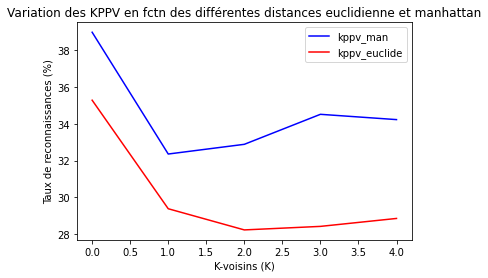

In [17]:
from sklearn.metrics import confusion_matrix

# Euclide
def varkppv_euc(n):
    classifier = KNeighborsClassifier(n_neighbors = n, p = 2)
    classifier.fit(X_scaled_train,y_train)
    y_pred = classifier.predict(X_scaled_test)
    C = confusion_matrix(y_test,y_pred)
    return np.sum(np.diag(C))/np.sum(C)*100

# Manhattan 
def varkppv_man(n):
    classifier = KNeighborsClassifier(n_neighbors = n, p = 1)
    classifier.fit(X_scaled_train, y_train)
    y_pred = classifier.predict(X_scaled_test)
    C = confusion_matrix(y_test, y_pred)
    return np.sum(np.diag(C))/np.sum(C)*100

# Affichage des courbes de Variations KPPV en fctn des différentes distances euclidienne et manhattan  
kppv_euclide = []
kppv_man = []
for i in range(1,6):
    kppv_euclide.append(varkppv_euc(i))
    kppv_man.append(varkppv_man(i))
    
plt.plot(kppv_man,'b', label = "kppv_man") 
plt.plot(kppv_euclide,'r', label = "kppv_euclide") 
plt.title("Variation des KPPV en fctn des différentes distances euclidienne et manhattan")
plt.xlabel("K-voisins (K)")
plt.ylabel("Taux de reconnaissances (%)")
plt.legend()
plt.show()

## SVC + SIFT Optimisations

Optimisation of the SVC Model with Sift Feature extractions.
we will reduce the dataset to 1000 images because the shape of the feature extraction is too big.

In [64]:
from sklearn.metrics import accuracy_score
import seaborn as sns

# Training and evaluating
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print ("Accuracy on testing set:")
    print (accuracy_score(y_test, y_pred))

    print ("\nClassification Report:")
    print (metrics.classification_report(y_test, y_pred))
    
    print ("Confusion Matrix:")
    C = np.array(metrics.confusion_matrix(y_test, y_pred))
    sns.heatmap(C, annot=True, cmap='Blues')

In [67]:
# Get features based on SIFT features
def getSIFTfeatures(input_img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Create a sift object
    sift = cv2.SIFT_create()

    # Create keypoints for every pixel in the image
    height, width = gray.shape
    keypoints = [cv2.KeyPoint(x, y, 10) for y in range(height) for x in range(width)]
    
    # Convert keypoints to a list of points
    points = cv2.KeyPoint_convert(keypoints)

    # Compute descriptor vectors for the keypoints
    _, descriptors = sift.compute(gray, keypoints)

    return points, descriptors

In [68]:
image_data = []
for image in image_list[:2000]:
    im_feature = getSIFTfeatures(image)[1]
    im_data = im_feature.flatten()
    
    if np.shape(im_data)[0] < 614400: 
        im_data = np.append(im_data, np.zeros(614400 - np.shape(im_data)[0]))
    
    image_data.append(im_data)
    
print("shape of image_data :",np.shape(image_data))

shape of image_data : (2000, 614400)


In [69]:
from sklearn.model_selection import train_test_split

X1 = image_data[:2000]
y1 = label[:2000]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
print("X_train1 :",np.shape(X_train1))

X_train1 : (1600, 614400)


In [24]:
from sklearn.svm import SVC

# different machine learning algrithom
svc_2 = SVC(kernel='linear', decision_function_shape='ovo')

Accuracy on testing set:
0.74

Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.73      0.81        26
          10       0.65      0.89      0.75        35
          11       0.81      0.63      0.71        35
          12       0.90      0.95      0.92        37
          13       0.66      0.81      0.72        26
           2       0.96      0.92      0.94        26
           3       0.90      0.96      0.93        27
           4       0.92      0.92      0.92        24
           5       0.71      0.65      0.68        37
           6       0.58      0.57      0.58        37
           7       0.50      0.50      0.50        32
           8       0.59      0.63      0.61        27
           9       0.75      0.58      0.65        31

    accuracy                           0.74       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.75      0.74      0.74       400

Confusion Matrix:


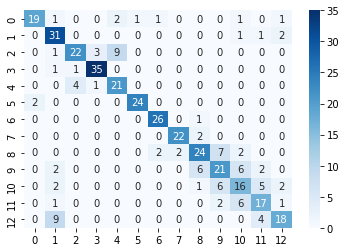

In [25]:
train_and_evaluate(svc_2, X_train1, X_test1, y_train1, y_test1)